# Group 22 Project Proposal

### Group Members:

Kaiser Ninomiya (41514506)

Patrick Cui (39674692)

Uday Kapoor (21201249)

Viet Ngo (71724082)

## Gender Wage Disparities in the United States: A Comparative Analysis

### Table of Contents

- [Introduction](#Introduction)
- [Preliminary Results](#Preliminary-Results)
    - [Data wrangling](#Data-wrangling)
    - [Plotting of relevant variables](#Plotting-of-relevant-variables)
- [Methods](#Methods)
    - [Trustworthiness of Report](#Trustworthiness-of-Report)
    - [Methods (PLAN)](#Methods-(PLAN))
    - [Reflecting on how the final report might play out](#Reflecting-on-how-the-final-report-might-play-out)
- [References](#References)

# Introduction

Our project aims to investigate gender wage disparities in the United States using a dataset containing information on various demographic and employment-related variables. We seek to answer whether there is a significant difference in wages between male and female workers.

# Preliminary Results

## Data wrangling

In [2]:
library(infer)
library(repr)
library(readr)
library(tidyverse)
library(RColorBrewer)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ dplyr   1.0.10
✔ tibble  3.1.8      ✔ stringr 1.4.1 
✔ tidyr   1.2.1      ✔ forcats 0.5.2 
✔ purrr   0.3.4      
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [3]:
raw_data <- read_csv('https://github.com/AVietCong/stat201-group22-project/raw/main/Gender_Pay_Gap_dataset.csv')
head(raw_data)

Rows: 53790 Columns: 129
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr   (1): adj_occ2name
dbl (127): year, serial, numprec, gq, region, statefip, metro, metarea, coun...
lgl   (1): farm

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


year,serial,numprec,gq,region,statefip,metro,metarea,county,farm,⋯,foodcare,building,sales,officeadmin,farmer,constructextractinstall,production,transport,sumadj_occ,LEHS
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2013,4484,1,1,11,50,1,NA,NA,NA,⋯,0,0,0,0,0,0,0,0,1,1
2013,21761,3,1,21,39,3,2002,NA,NA,⋯,0,0,0,0,0,1,0,0,1,1
2013,7174,4,1,11,44,2,6483,NA,NA,⋯,0,0,0,0,0,0,0,0,1,1
2013,58428,1,1,31,12,3,4901,12009,NA,⋯,0,0,0,0,0,0,0,0,1,1
2013,2894,3,1,11,33,1,NA,NA,NA,⋯,0,0,0,0,0,0,0,1,1,1
2013,56021,1,1,31,12,4,2900,12001,NA,⋯,0,0,0,0,0,1,0,0,1,1


We have narrowed down the dataset to focus only on the variables of interest: namely sex, race, hourly wage(hrwage), total income (incwage), schooling years (sch), weeks worked (wkswork1), and usual hours worked (uhrswork).

In [4]:
raw_data$industry <- colnames(raw_data[,89:127])[apply(raw_data[,89:127], 1, which.max)]
head(raw_data)

year,serial,numprec,gq,region,statefip,metro,metarea,county,farm,⋯,building,sales,officeadmin,farmer,constructextractinstall,production,transport,sumadj_occ,LEHS,industry
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
2013,4484,1,1,11,50,1,NA,NA,NA,⋯,0,0,0,0,0,0,0,1,1,Medical
2013,21761,3,1,21,39,3,2002,NA,NA,⋯,0,0,0,0,1,0,0,1,1,publicadmin
2013,7174,4,1,11,44,2,6483,NA,NA,⋯,0,0,0,0,0,0,0,1,1,professional
2013,58428,1,1,31,12,3,4901,12009,NA,⋯,0,0,0,0,0,0,0,1,1,finance
2013,2894,3,1,11,33,1,NA,NA,NA,⋯,0,0,0,0,0,0,1,1,1,miningconstruction
2013,56021,1,1,31,12,4,2900,12001,NA,⋯,0,0,0,0,1,0,0,1,1,miningconstruction


In [5]:
filtered_data <- select(raw_data, sex, race, hrwage, incwage, sch, wkswork1, uhrswork, potexp, industry) %>%
    mutate(sex = as.factor(sex),
           race = as.factor(race),
           hrwage = as.double(hrwage),
           incwage = as.double(incwage),
           sch = as.double(sch),
           wkswork = as.integer(wkswork1),
           uhrswork = as.integer(uhrswork),
           potexp = as.integer(potexp),
            industry = as.character(industry))
head(filtered_data)

sex,race,hrwage,incwage,sch,wkswork1,uhrswork,potexp,industry,wkswork
<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<chr>,<int>
1,1,24.91259,57000,14,52,44,42,Medical,52
1,1,31.00000,62000,13,50,40,40,publicadmin,50
1,3,21.63461,45000,12,52,40,26,professional,52
1,1,12.82051,28000,12,52,42,23,finance,52
1,1,21.25000,42500,12,50,40,17,miningconstruction,50
1,1,21.87500,35000,11,40,40,18,miningconstruction,40


In [6]:
pay_data <- filtered_data %>%
    mutate(sex = fct_recode(sex, 'male' = '1', 'female' = '2'),
           race = fct_recode(race, 'White' = '1', 'Black' = '2', 'Hispanic' = '3', 'Other' = '4'),
           education_level = case_when(sch == 0 ~ 'None',
                                       sch < 12 ~ 'Incomplete Schooling', 
                                       sch == 12 ~ 'Highschool',
                                       sch == 13 ~ 'College',
                                       sch == 14 ~ 'Associate Degree',
                                       sch <= 16 ~ 'BA',
                                       sch <= 18 ~ 'Advanced Degree'))
head(pay_data)

sex,race,hrwage,incwage,sch,wkswork1,uhrswork,potexp,industry,wkswork,education_level
<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<chr>,<int>,<chr>
male,White,24.91259,57000,14,52,44,42,Medical,52,Associate Degree
male,White,31.00000,62000,13,50,40,40,publicadmin,50,College
male,Hispanic,21.63461,45000,12,52,40,26,professional,52,Highschool
male,White,12.82051,28000,12,52,42,23,finance,52,Highschool
male,White,21.25000,42500,12,50,40,17,miningconstruction,50,Highschool
male,White,21.87500,35000,11,40,40,18,miningconstruction,40,Incomplete Schooling


In [17]:
cat("mean for male: ", mean(subset(pay_data, sex=="male")$hrwage), "\n")
cat("median for male: ", median(subset(pay_data, sex=="male")$hrwage), "\n")
cat("sd for male: ", sd(subset(pay_data, sex=="male")$hrwage), "\n", "\n")
cat("mean for female: ", mean(subset(pay_data, sex=="female")$hrwage), "\n")
cat("median for female: ", median(subset(pay_data, sex=="female")$hrwage), "\n")
cat("sd for female: ", sd(subset(pay_data, sex=="female")$hrwage), "\n")

mean for male:  28.84364 
median for male:  21.63461 
sd for male:  221.4018 
 
mean for female:  21.92408 
median for female:  17.30769 
sd for female:  23.50221 


## Plotting of relevant variables

### Demographics

In [8]:
sex_summary <- pay_data |>
    group_by(sex) |>
    summarise(count = n())
sex_summary

sex,count
<fct>,<int>
male,27225
female,26565


We can see that the number of man and woman in the survey are roughly equal.

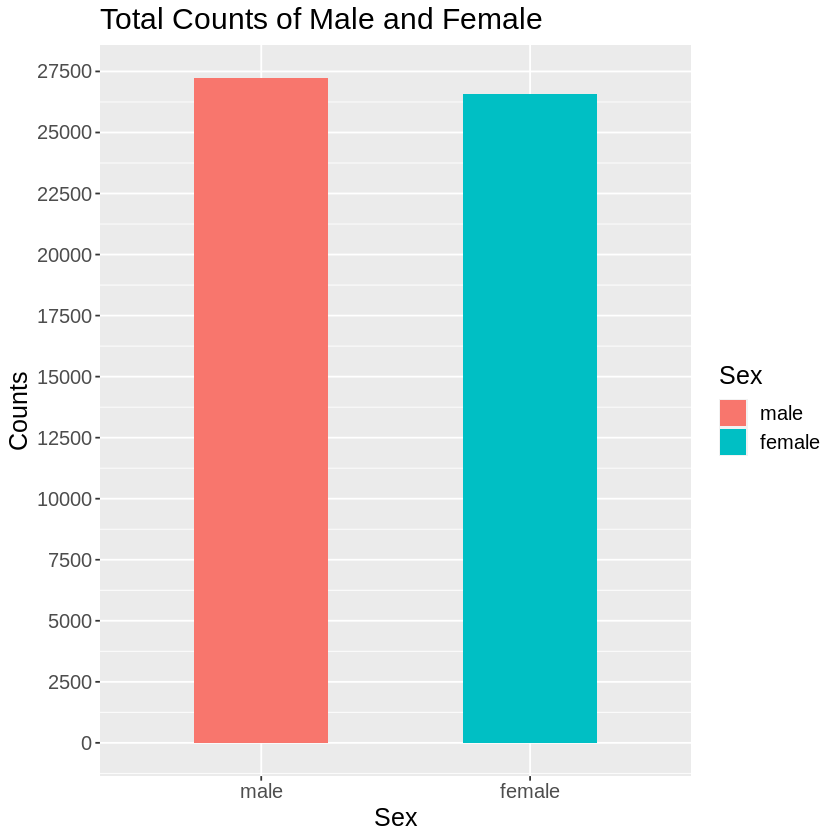

In [9]:
sex_plot <- sex_summary |>
    ggplot(aes(x = sex, y = count, fill = sex)) +
    geom_bar(stat = "identity", width = 0.5) +
    scale_y_continuous(breaks=seq(0, 27500, by = 2500)) +
    labs(x = "Sex", y = "Counts", fill = "Sex") +
    theme(text = element_text(size = 15)) +
    ggtitle("Total Counts of Male and Female")
    
sex_plot

### Average Potential Experience of Man and Woman

In [10]:
avg_potexp_summary <- pay_data %>%
    group_by(sex) %>%
    summarise(avg_potexp = mean(potexp))
avg_potexp_summary

sex,avg_potexp
<fct>,<dbl>
male,22.64522
female,22.77030


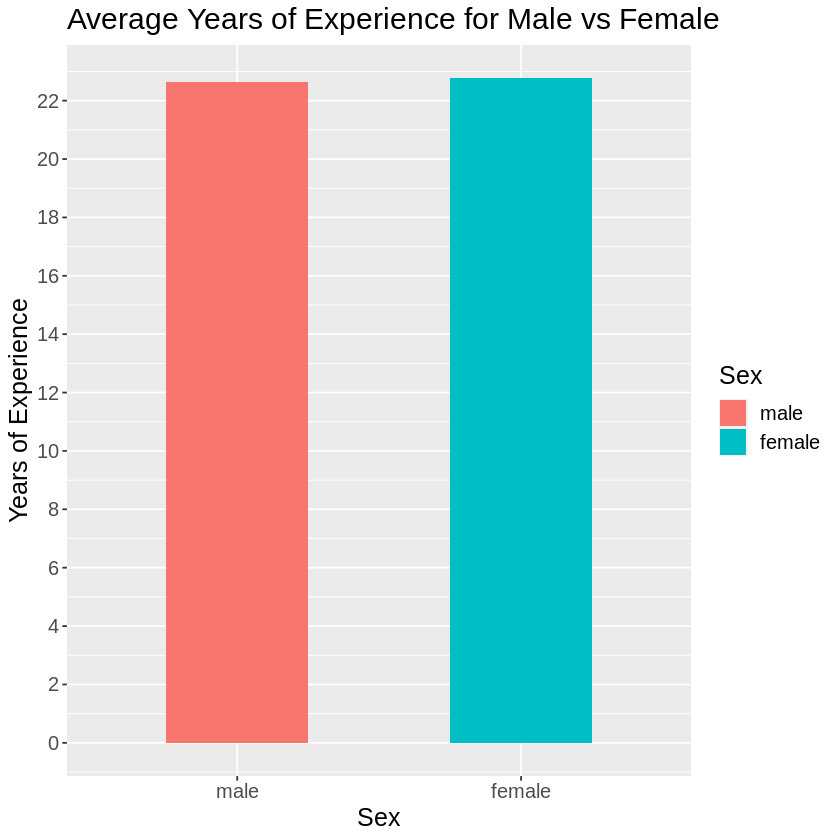

In [11]:
avg_potexp_plot <- ggplot(avg_potexp_summary, aes(x = sex, y = avg_potexp, fill = sex)) + 
    geom_bar(stat = 'identity', width = 0.5) + 
    scale_y_continuous(breaks=seq(0, 25, by = 2)) +
    labs(x = 'Sex', y = 'Years of Experience', title = 'Average Years of Experience for Male vs Female', fill = "Sex") +
    theme(text = element_text(size = 15))

avg_potexp_plot

We can see that, on average, both man and womean have very similar work experience and any difference is very neglibile.

### Education Level

In [12]:
education_level_summary <- pay_data %>%
    group_by(sex) %>%
    summarise(none = mean(education_level == 'None') * 100,
              incomplete = mean(education_level == 'Incomplete Schooling') * 100,
              highschool = mean(education_level == 'Highschool') * 100,
              college = mean(education_level == 'College') * 100,
              associate = mean(education_level == 'Associate Degree') * 100,
              ba = mean(education_level == 'BA') * 100,
              advanced = mean(education_level == 'Advanced Degree') * 100)
education_level_summary

sex,none,incomplete,highschool,college,associate,ba,advanced
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
male,0.2754821,7.911846,29.18274,16.60606,10.43159,22.69238,12.89991
female,0.1392810,5.010352,24.25748,16.79277,13.41991,25.31526,15.06494


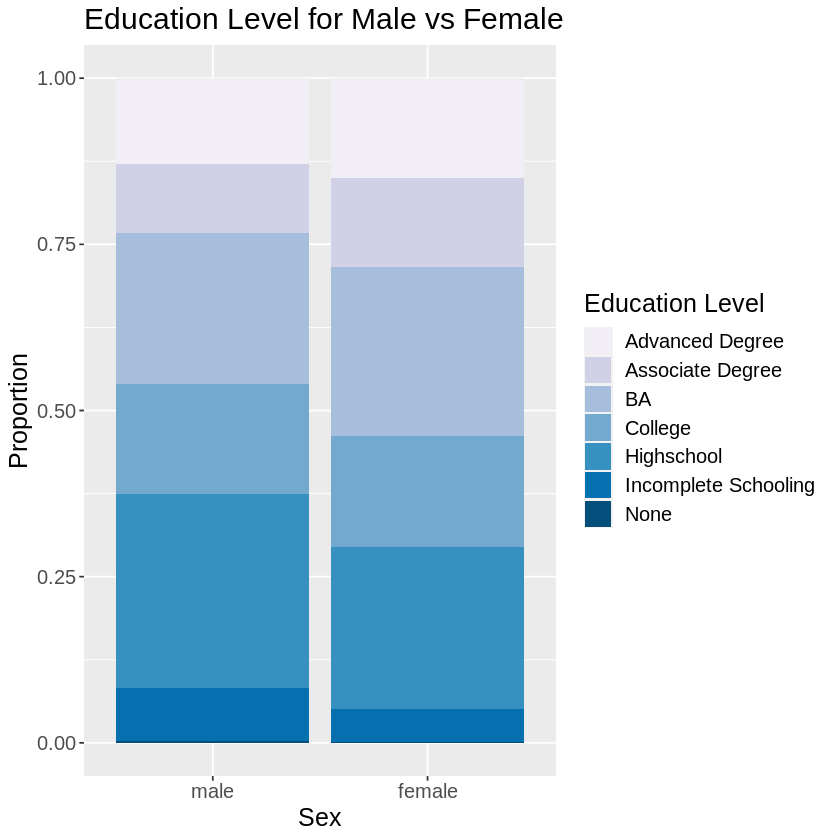

In [13]:
schooling_plot <- ggplot(pay_data, aes(x = sex, fill = factor(education_level))) + 
    geom_bar(position = 'fill') + 
    labs(x = 'Sex', y = 'Proportion', title = 'Education Level for Male vs Female', fill = 'Education Level') +
    theme(text = element_text(size = 15)) +
    scale_fill_brewer(palette = 'PuBu')

schooling_plot

There's some difference in education between men and women. Overall, women are more likely to have a postsecondary education than man.

## Average Usual Hours Worked per Week

In [14]:
avg_hrs_summary <- pay_data |>
    group_by(sex) |>
    summarise(avg_hrs = mean(uhrswork))
avg_hrs_summary

sex,avg_hrs
<fct>,<dbl>
male,42.88779
female,38.14896


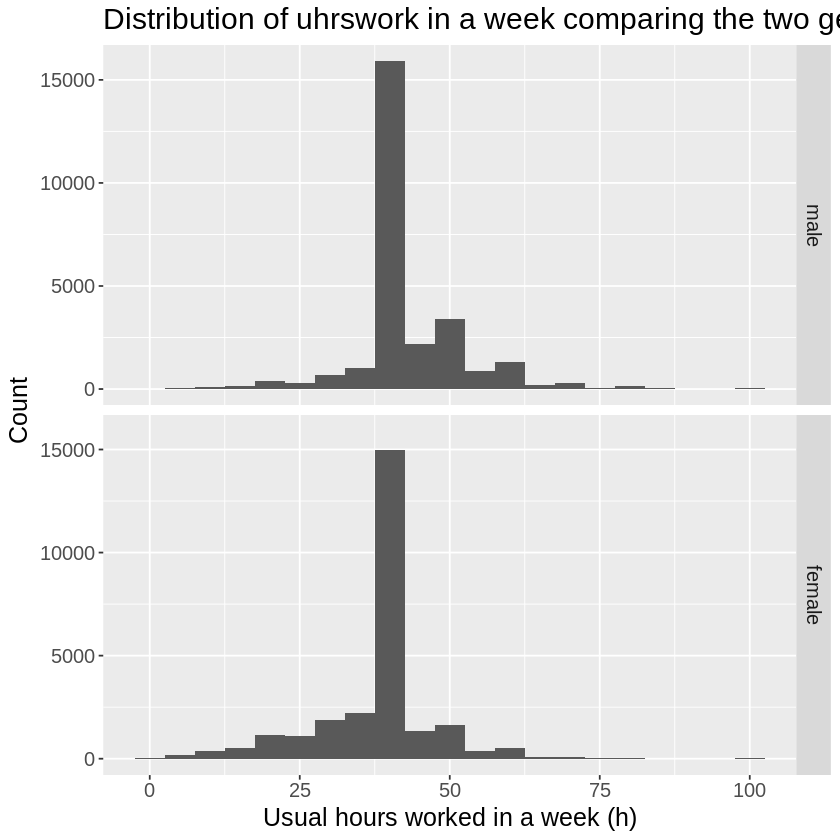

In [22]:
avg_hrs_plot <- pay_data |>
    ggplot(aes(x = uhrswork), fill = sex) +
    geom_histogram(binwidth = 5) +
    facet_grid(vars(sex)) +
    theme(text = element_text(size = 15)) +
    labs(x = "Usual hours worked in a week (h)", y = "Count", title = "Distribution of uhrswork in a week comparing the two genders")
avg_hrs_plot

Most worked 40 hours a week. If we look more closely, the distribution for women is slightly left-skewed and right-skewed for men. 

## Hourly Wage 

Warning message:
“Removed 1186 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 4 rows containing missing values (geom_bar).”


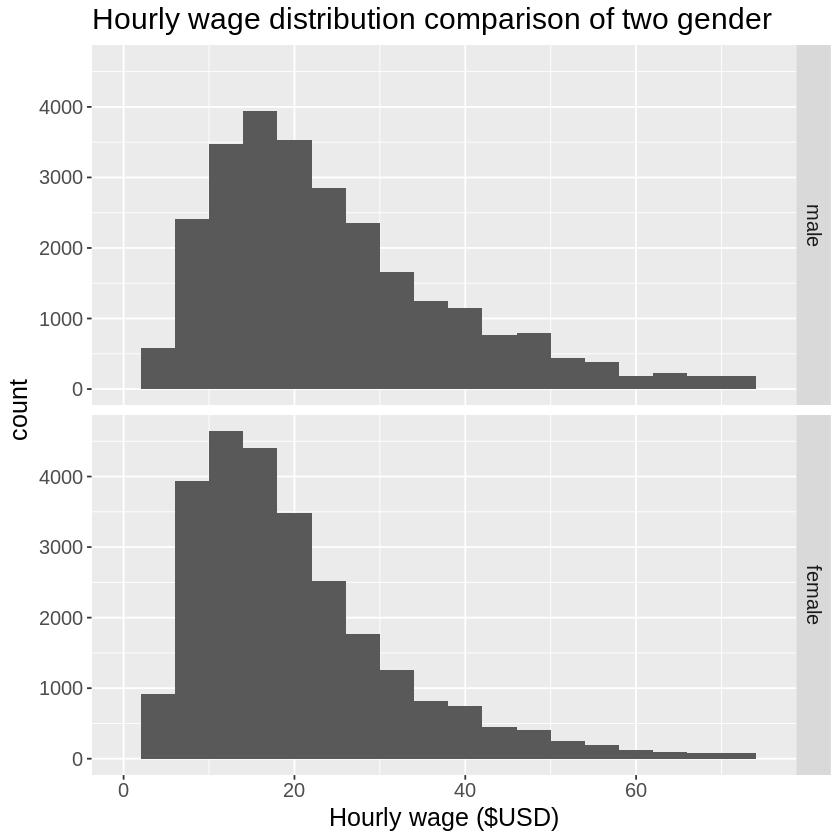

In [17]:
hrwage_plot <- pay_data%>%ggplot() +
  geom_histogram(aes(x = hrwage), binwidth = 4) +
  facet_grid(vars(sex)) + 
  xlim(0, 75) + xlab("Hourly wage ($USD)") + 
  ggtitle("Hourly wage distribution comparison of two gender") +
  theme(text = element_text(size = 15))
hrwage_plot

In [18]:
avg_wage <- pay_data %>%
    group_by(industry,sex) %>% 
    summarise(avg_wage = mean(hrwage))
head(avg_wage)

`summarise()` has grouped output by 'industry'. You can override using the
`.groups` argument.


industry,sex,avg_wage
<chr>,<fct>,<dbl>
Agriculture,male,15.75883
Agriculture,female,17.57063
Communications,male,34.62143
Communications,female,25.10552
durables,male,28.37269
durables,female,21.79669


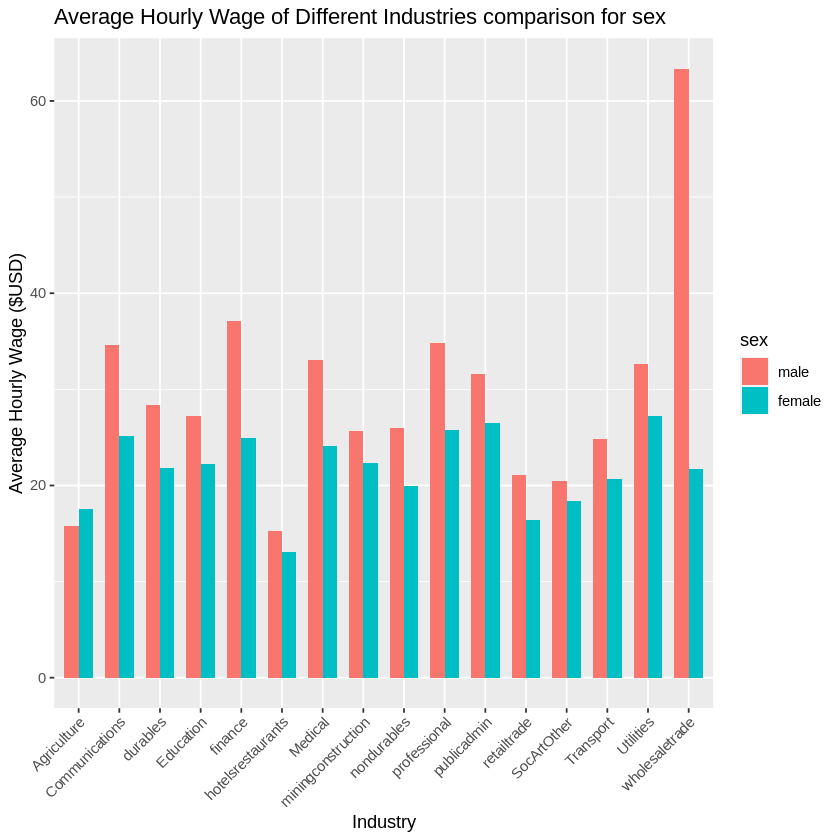

In [19]:
industry_plot <- avg_wage %>% ggplot() +
    geom_bar(aes(x = factor(industry), y = avg_wage, fill = sex), stat = "identity", position = "dodge", width = 0.7) +
    labs(list(x = "x", y = "count",fill = "group")) + 
    theme(axis.text.x = element_text(angle =45, hjust = 1)) +
    xlab("Industry") + 
    ylab("Average Hourly Wage ($USD)") +
    ggtitle("Average Hourly Wage of Different Industries comparison for sex")
industry_plot

On average, men are paid more than women in almost all industries, except agriculture.

# Methods

## Trustworthiness of Report

This report aims to ensure its trustworthiness by adhering to the following principles and practices:

**Rigorous Statistical Methods:** By using robust techniques such as hypothesis testing and confidence interval construction, the analysis aims to provide reliable estimates of the wage gap.

**Transparent Data Preprocessing:** The report ensures that the dataset is cleaned and tidied in a manner that minimizes biases and promotes data integrity.

**Reproducibility:** All statistical software code will be included upon setting a seed, enabling others to replicate the results and verify the findings.

**Robustness Checks:** The report incorporates bootstrapping and asymptotic methods to validate the results obtained from traditional hypothesis testing and confidence intervals. 


## Methods (PLAN)

**Data Preprocessing**
- Import the dataset
- Filter the dataset to include only relevant variables and omit any missing data.

**Hypothesis Testing**
- Null hypothesis (H0): There is no significant difference in average hourly wages between male and female workers.
- Alternative hypothesis (H1): There is a significant difference in average hourly wages between male and female workers.
- Two-sample t-test: Difference in the median hourly wages of male and female workers.
- Non-parametric Wilcoxon rank-sum test: to assess wage differences without assuming normality. 

**Bootstrapping and confidence interval**
- Create a bootstrap distribution along with confidence intervals using the original sample, to estimate the variability of our parameter of interest. 
Asymptotics:
- Utilize asymptotic methods, such as the Central Limit Theorem and compare it with bootstrapped estimates for a thorough validation.

**Visualization and Interpretation**
- Present the result of our findings mainly through histogram, and interpret hypothesis tests and CI to assess the significance of the gender wage gap.


## Reflecting on how the final report might play out

**Expected Findings:**
We expect to find that female workers earn less median hourly wages than their male counterparts. Additionally, we may anticipate uncovering variations in wage gaps across different racial groups, providing deeper insights into intersectional inequalities.

**Impact of Findings:**
Highlighting the gender wage gap can serve as a call to action for policymakers, employers, and advocates to address this pressing issue. By quantifying the existence of disparities, our study can contribute to the ongoing efforts towards gender equality in the workforce. 

**Future Question:**
Wage Gap in Different Industries: Investigating the wage gap across various industries and occupations could help identify sectors with more significant disparities and guide targeted interventions.

# References

1) Deep B. (2021). Gender Pay Gap Dataset. Kaggle. Retrieved from: https://www.kaggle.com/code/deepbdoshi/gender-pay-gap

2) Blau, F. D., & Kahn, L. M. (2017). The Gender Wage Gap: Extent, Trends, and Explanations. Journal of Economic Literature, 55(3), 789–865. http://www.jstor.org/stable/26303306

3) Pew Research Center. (March 1, 2023). Gender Pay Gap Facts. Pew Research Center. Retrieved from https://www.pewresearch.org/short-reads/2023/03/01/gender-pay-gap-facts/